# **Часть 1**

## 1. Загрузка и исследование данных:

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


## 2. Создание сверточной нейронной сети

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## 3. Обучение сети:

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3201 - loss: 1.8366 - val_accuracy: 0.5284 - val_loss: 1.3149
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.5320 - loss: 1.3069 - val_accuracy: 0.5611 - val_loss: 1.2493
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.5916 - loss: 1.1540 - val_accuracy: 0.5874 - val_loss: 1.1969
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6306 - loss: 1.0438 - val_accuracy: 0.6276 - val_loss: 1.0590
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 44ms/step - accuracy: 0.6624 - loss: 0.9591 - val_accuracy: 0.6582 - val_loss: 0.9776
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.6835 - loss: 0.8976 - val_accuracy: 0.6551 - val_loss: 0.9930
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6982 - loss: 0.8589 - val_accuracy: 0.6600 - val_loss: 0.9919
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7180 -

## 4. Визуализация

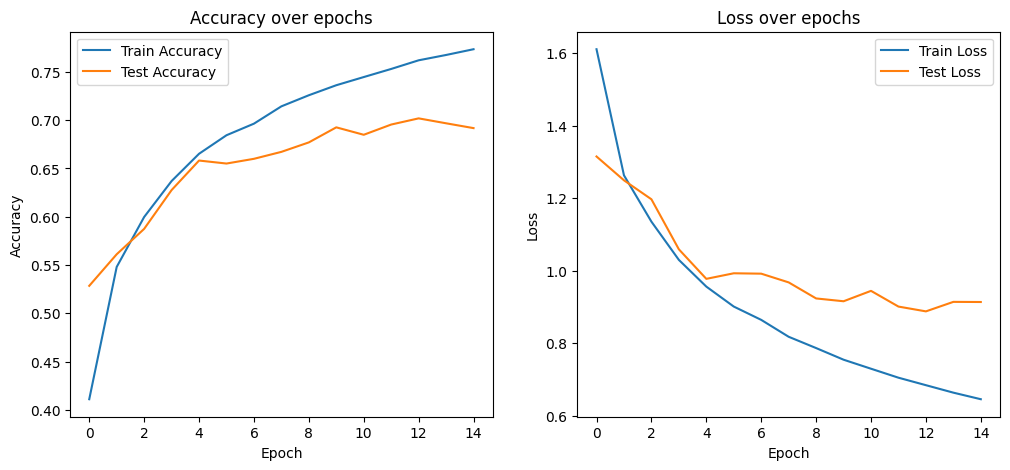

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

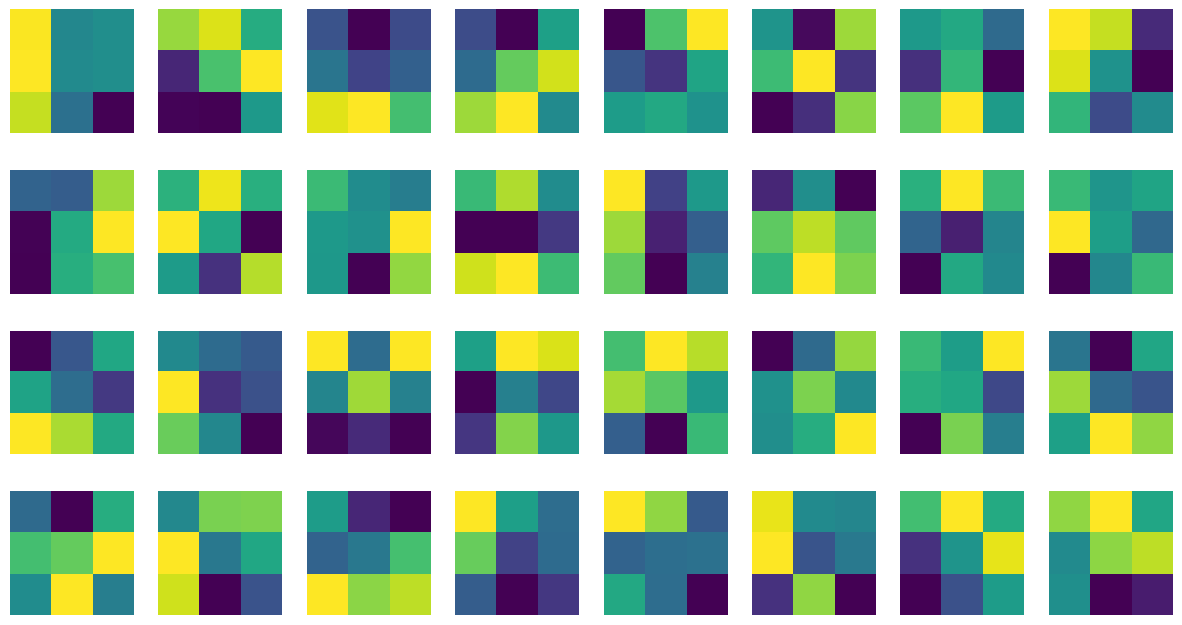

In [ ]:
filters, biases = model.layers[0].get_weights()
filters = (filters - filters.min()) / (filters.max() - filters.min())

n_filters = 32
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(n_filters):
    f = filters[:, :, :, i]
    axs[i // 8, i % 8].imshow(f[:, :, 0])
    axs[i // 8, i % 8].axis('off')
plt.show()

# **Часть 2**

# 1. Параметры сети:

In [ ]:
model_custom = models.Sequential()
model_custom.add(layers.Conv2D(64, (5, 5), activation='sigmoid', input_shape=(32, 32, 3)))
model_custom.add(layers.MaxPooling2D((2, 2)))

model_custom.add(layers.Conv2D(64, (5, 5), activation='sigmoid'))
model_custom.add(layers.MaxPooling2D((2, 2)))

model_custom.add(layers.Flatten())
model_custom.add(layers.Dense(64, activation='sigmoid'))
model_custom.add(layers.Dense(10, activation='softmax'))

model_custom.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_custom = model_custom.fit(x_train, y_train, epochs=15,
                                  validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 92ms/step - accuracy: 0.1915 - loss: 2.1398 - val_accuracy: 0.4117 - val_loss: 1.6067
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 217s 102ms/step - accuracy: 0.4314 - loss: 1.5671 - val_accuracy: 0.4761 - val_loss: 1.4605
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 90ms/step - accuracy: 0.4941 - loss: 1.4076 - val_accuracy: 0.5121 - val_loss: 1.3532
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 89ms/step - accuracy: 0.5258 - loss: 1.3199 - val_accuracy: 0.5295 - val_loss: 1.3118
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 89ms/step - accuracy: 0.5596 - loss: 1.2434 - val_accuracy: 0.5549 - val_loss: 1.2393
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 92ms/step - accuracy: 0.5859 - loss: 1.1654 - val_accuracy: 0.5771 - val_loss: 1.1853
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 89ms/step - accuracy: 0.6103 - loss: 1.1033 - val_accuracy: 0.5859 - val_loss: 1.1568
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 92ms/step - accuracy:

# 2. Анализ моделей:

In [ ]:
model_base = models.Sequential()
model_base.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_base.add(layers.MaxPooling2D((2, 2)))

model_base.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_base.add(layers.MaxPooling2D((2, 2)))

model_base.add(layers.Flatten())
model_base.add(layers.Dense(64, activation='relu'))
model_base.add(layers.Dense(10, activation='softmax'))

model_base.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_base = model_base.fit(x_train, y_train, epochs=15,
                              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3789 - loss: 1.7034 - val_accuracy: 0.5586 - val_loss: 1.2425
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5837 - loss: 1.1850 - val_accuracy: 0.6162 - val_loss: 1.1092
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.6353 - loss: 1.0518 - val_accuracy: 0.6375 - val_loss: 1.0345
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.6610 - loss: 0.9720 - val_accuracy: 0.6558 - val_loss: 0.9936
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.6825 - loss: 0.8991 - val_accuracy: 0.6692 - val_loss: 0.9531
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.7019 - loss: 0.8511 - val_accuracy: 0.6739 - val_loss: 0.9492
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.7180 - loss: 0.8039 - val_accuracy: 0.6808 - val_loss: 0.9314
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.7321 -

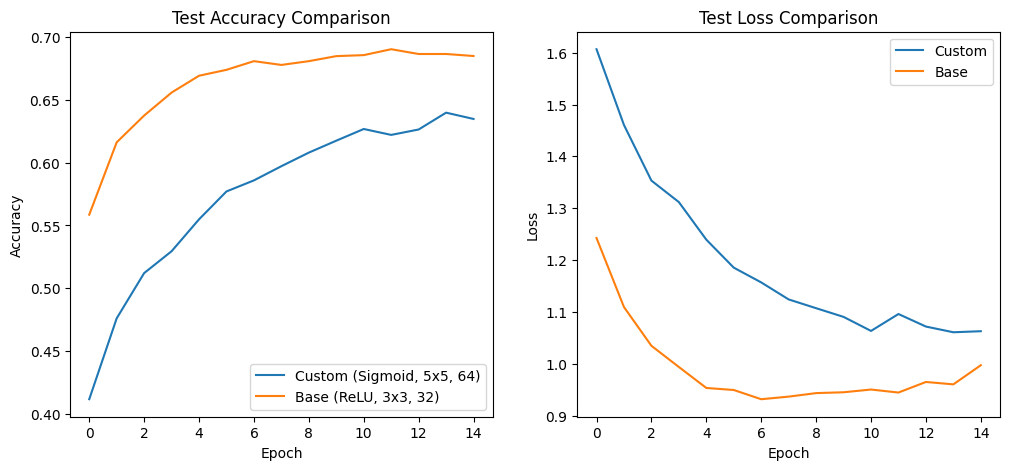

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_custom.history['val_accuracy'], label='Custom (Sigmoid, 5x5, 64)')
plt.plot(history_base.history['val_accuracy'], label='Base (ReLU, 3x3, 32)')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_custom.history['val_loss'], label='Custom')
plt.plot(history_base.history['val_loss'], label='Base')
plt.title('Test Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Часть 3**

## 1. Итоговые метрики

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


y_pred = model_custom.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


report = classification_report(y_true, y_pred_classes, output_dict=True)
print("Accuracy:", report['accuracy'])
print("F1-мера (средняя):", report['weighted avg']['f1-score'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Accuracy: 0.6348
F1-мера (средняя): 0.6338828850273658


## 2. Интерпретация с Grad-CAM

In [ ]:
for layer in model_custom.layers:
    print(layer.name)

conv2d_6
max_pooling2d_6
conv2d_7
max_pooling2d_7
flatten_2
dense_4
dense_5


In [ ]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.7 MB/s eta 0:00:00


In [8]:
from tf_keras_vis.saliency import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore


gradcam = Gradcam(model, model_modifier=ReplaceToLinear())
score = CategoricalScore([target_class_index])
cam = gradcam(score, seed_input=image_input)

ImportError: cannot import name 'Gradcam' from 'tf_keras_vis.saliency' (/usr/local/lib/python3.11/dist-packages/tf_keras_vis/saliency.py)